# Imports

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from pycm import ConfusionMatrix
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
from sklearn.metrics import median_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import os
import pandas as pd
import random
from IPython.display import Markdown, display
%matplotlib inline


def printmd(string):
    display(Markdown(string))

# Importing the csv files

Importing the dataset and storing it in a variable called data

In [3]:
data = pd.read_csv('./data/data.csv')

# Data Exploration

# This dataset as 21 features and 2000 entries. The meanings of the features are given below:

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The above info reveals that all attributes are numerical i.e. either float or int

In [7]:
data.describe() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


The above show some basic metrics for each feature in our dataset

# Data Visualization

## Histogram Plot

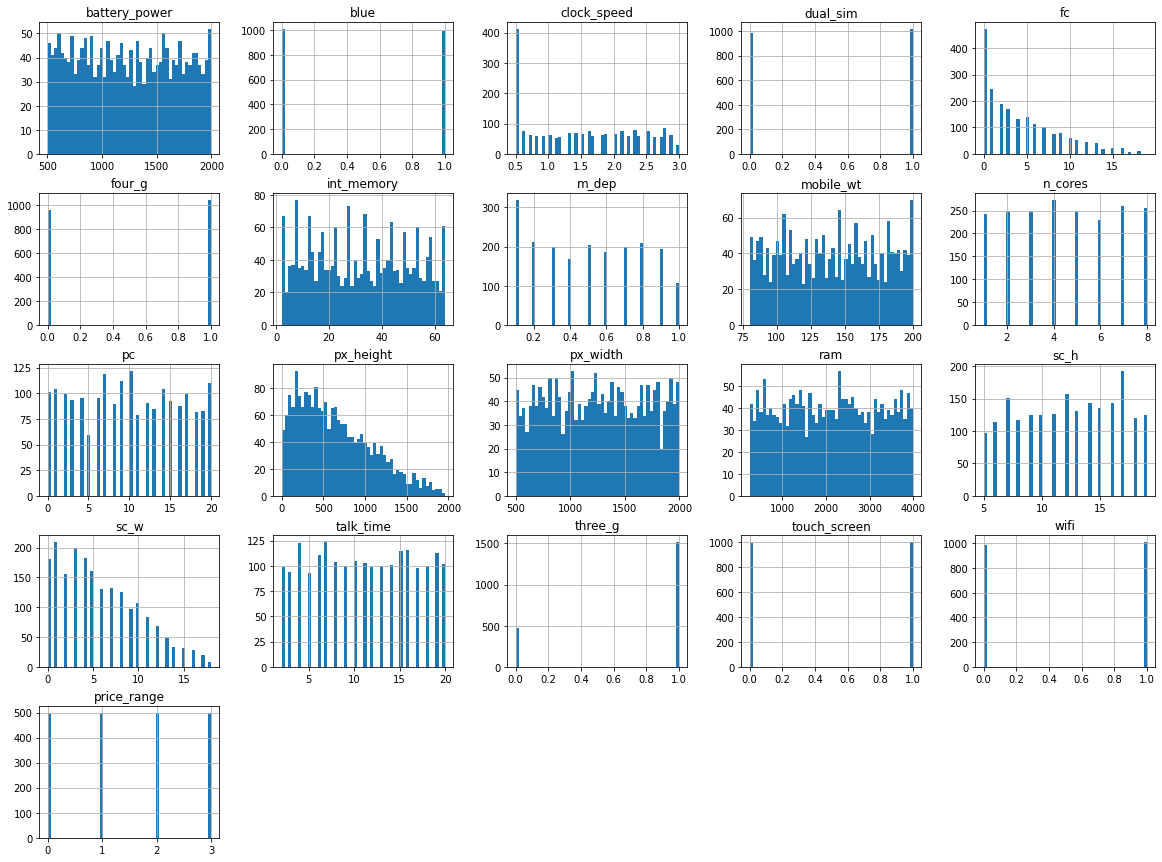

In [8]:
#To plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

## Box Plots and Pie Charts

The following code will find all the features that are binary ,will print them and store their column names in a list

It plots a pie chart for each binary feature and a boxplot for the rest

In [9]:
def plot_boxplot(data):  
    binary_features = [] # list of binary features
    for col in data.columns:
        if data[col].unique().shape[0] == 2: # if there are only two unique values i.e. binary features
            print(col)
            binary_features.append(col)  
    fig, ax = plt.subplots(len(data.columns)//3, 3, figsize=(20, len(data.columns)*2), frameon=False)
    c = 0
    for col in data.columns:

        if (col in binary_features):
            ax[c//3, c % 3].set_title(col)  
            ax[c//3, c % 3].pie(data[col].value_counts(), labels=data[col].unique())
            ax[c//3, c % 3].set_title(col)
            ax[c//3, c % 3].legend(loc='best')
        else:
            ax[c//3, c % 3].set_title(col)  
            sns.boxplot(x=data[col],data=data, ax=ax[c//3, c % 3])
        c += 1
    plt.show()


blue
dual_sim
four_g
three_g
touch_screen
wifi


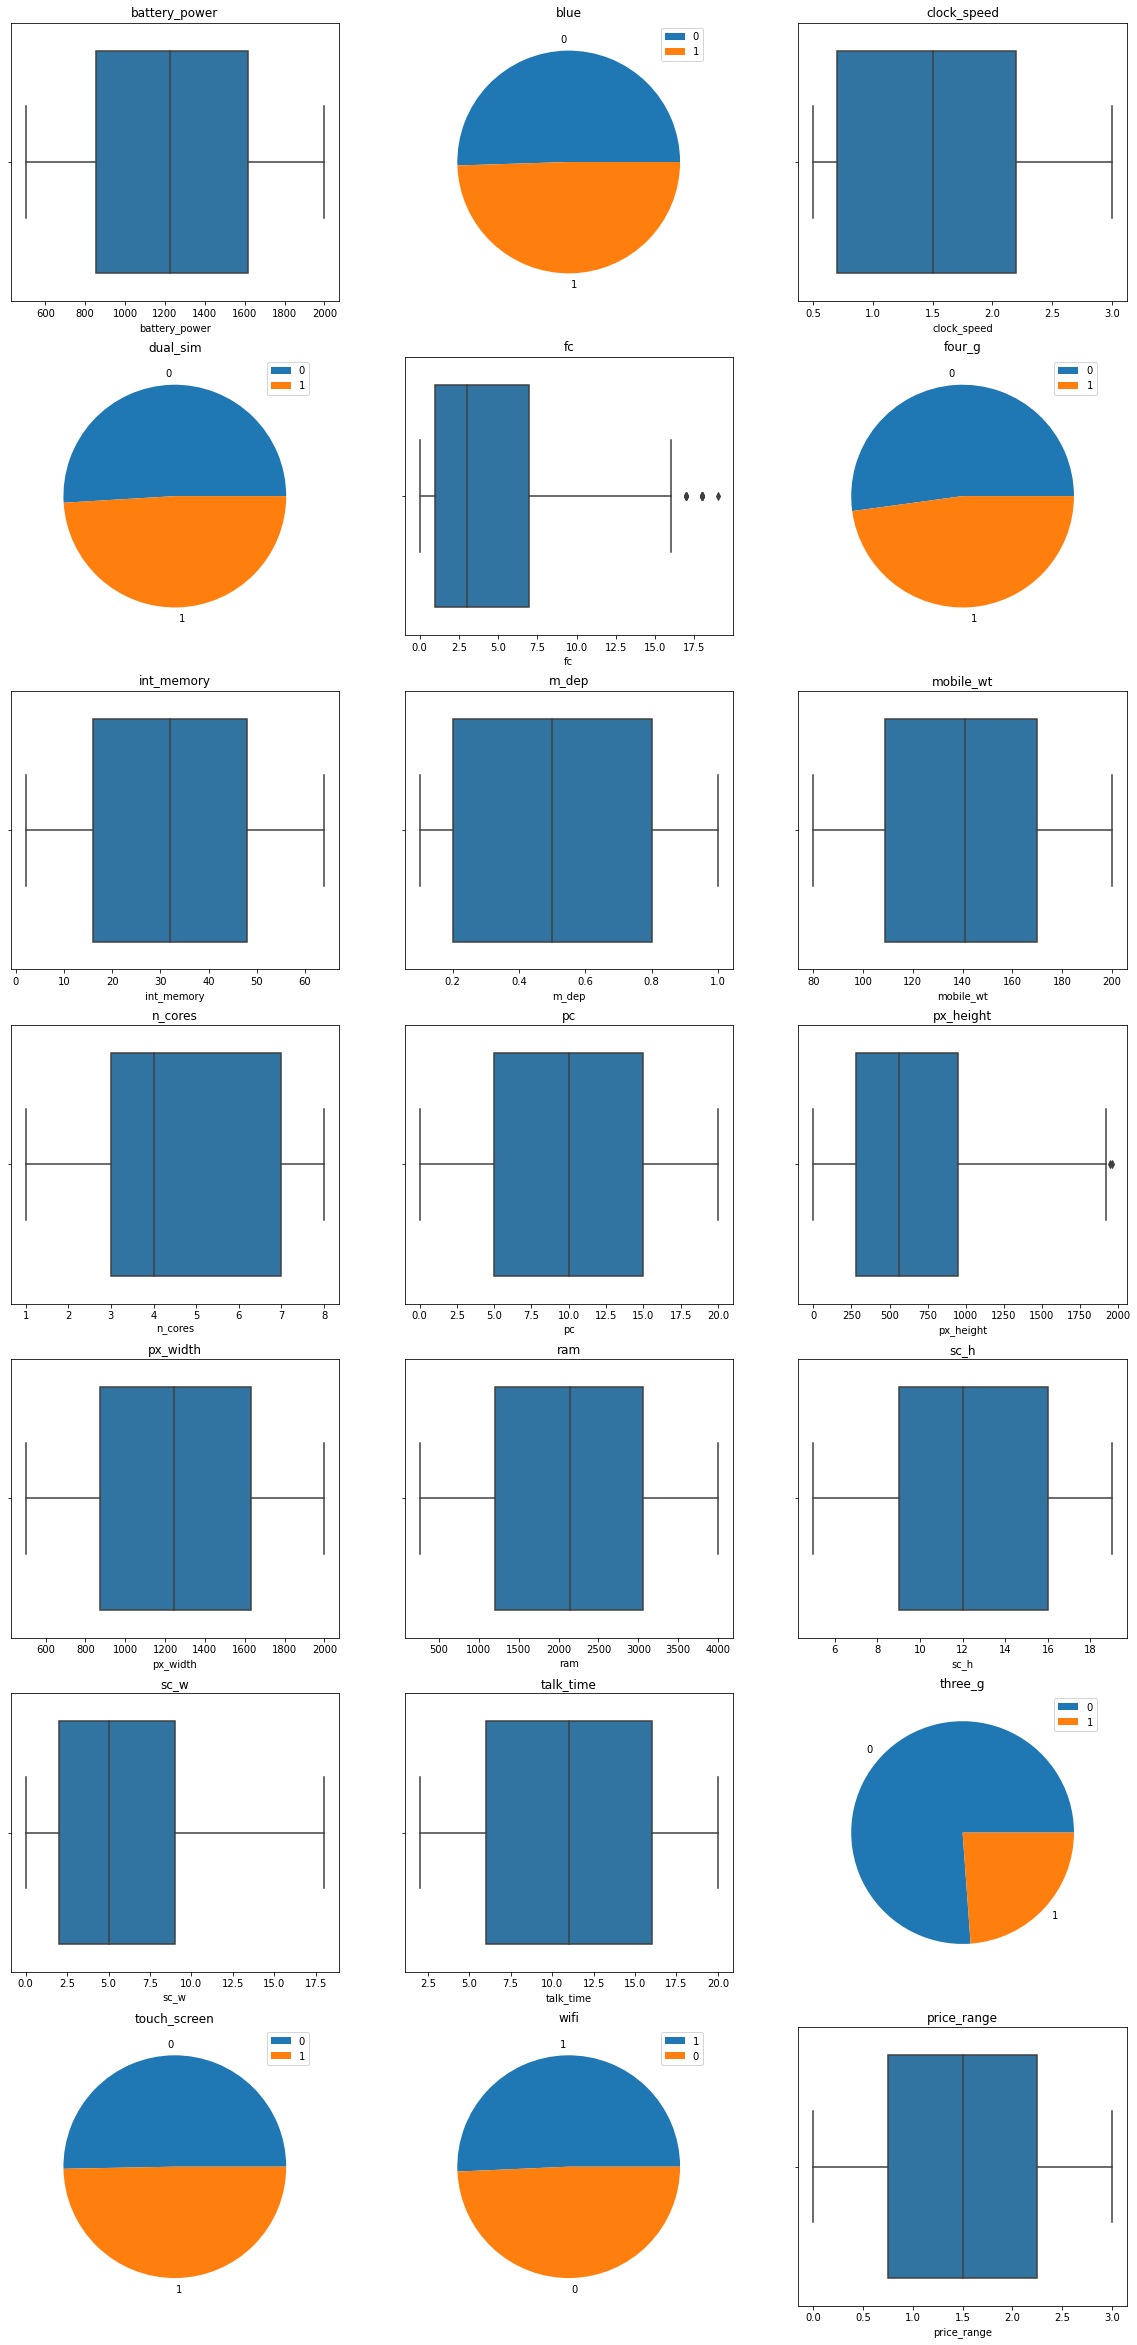

In [10]:
plot_boxplot(data)

From the above boxplots, we can see that fc (front cameras) and px_height (pixel height) are the only features with outliers, we can try to remove the outliers using the formula below, i.e. setting a treshold value for the outliers and then removing them from the dataset.

In [11]:
for feature in data.columns:
    mean = data[feature].mean()
    std = data[feature].std()
    treshold = std * 3
    
    lower_bound = mean - treshold
    upper_bound = mean + treshold
    
    data = data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

blue
dual_sim
four_g
three_g
touch_screen
wifi


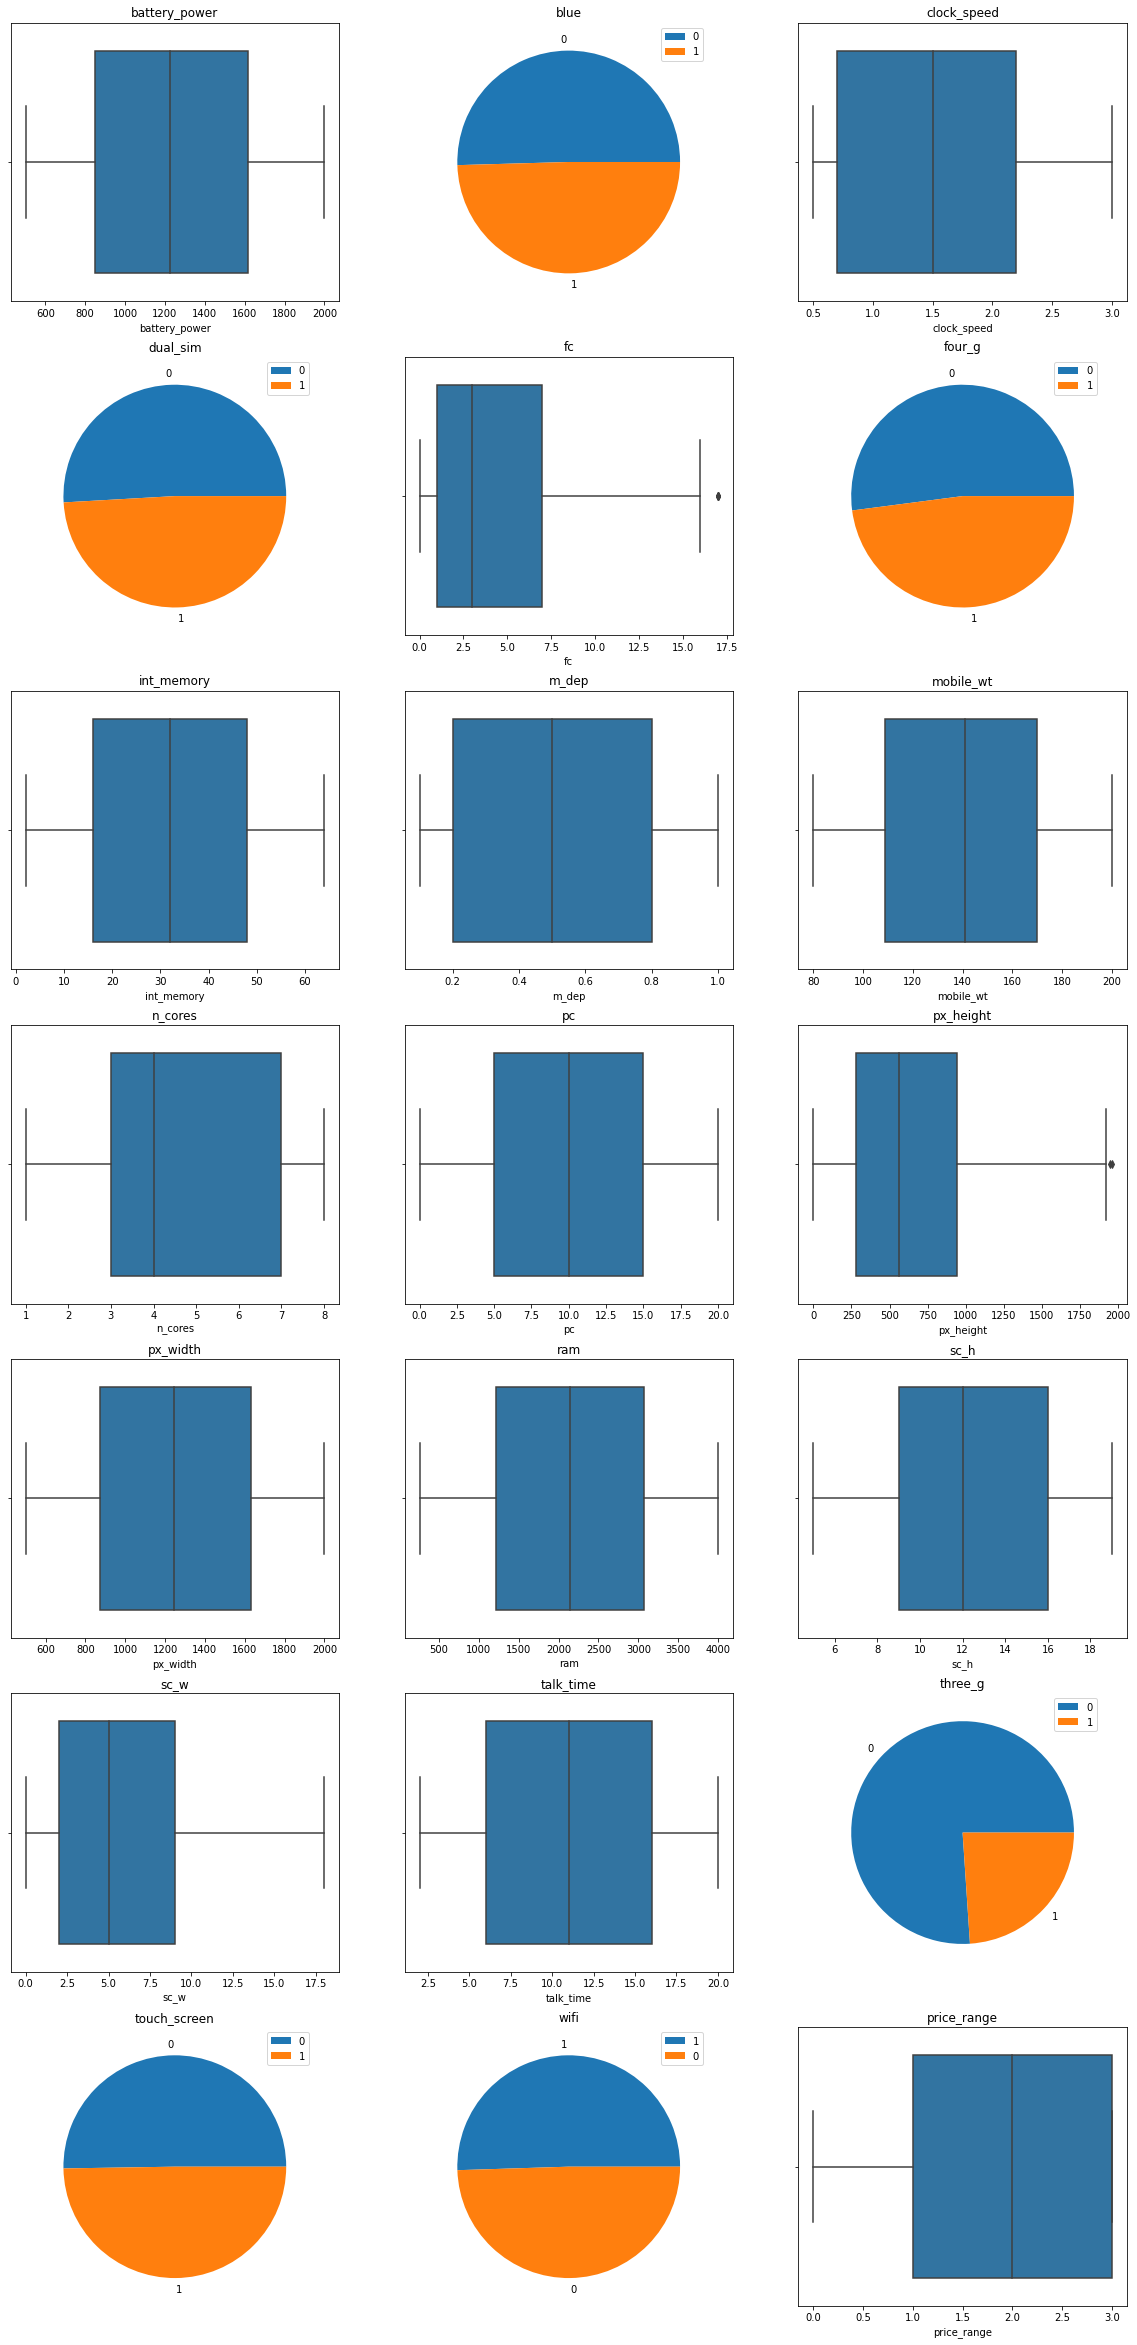

In [12]:
plot_boxplot(data)

We can see that we have significantly reduced the outliers in the dataset.

In [13]:
data.shape

(1988, 21)

Also we can see that 12 entries were removed in the process of removing the outliers.

## Correlation Matrix and Heatmap

The following code finds the correlation matrix of our dataset and plots a heatmap of it

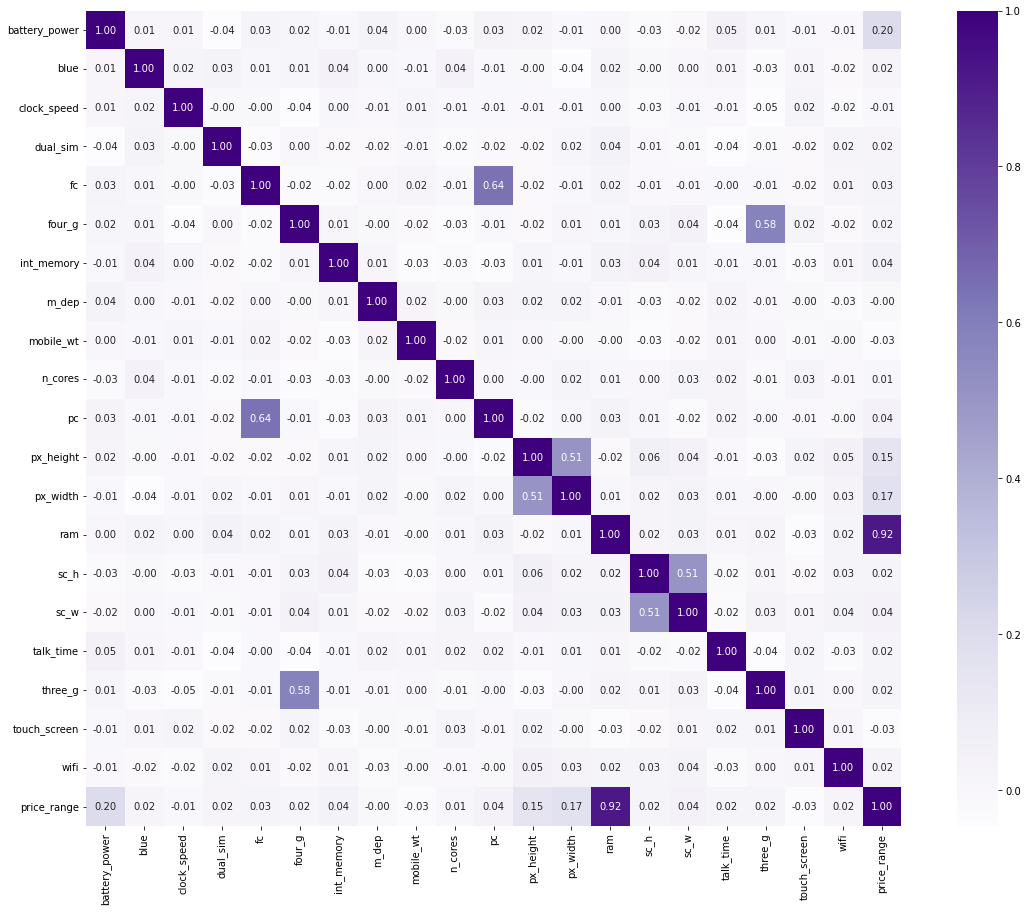

In [14]:
corr_matrix = data.corr()
# increases the resolution of the plot
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, square=True, cmap='Purples', annot=True, fmt='.2f')
plt.show()

The above correlation matrix shows how our Price Range has a very strong correlation with RAM.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
features have highly positive correlation.

In [15]:
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
m_dep           -0.001570
clock_speed     -0.006042
mobile_wt       -0.031180
touch_screen    -0.031501
Name: price_range, dtype: float64

ram has the highest positive correlation with the price_range of a positive 0.917, which implies the price_range is directly proportional to the ram and as the ram increases the price_range increases

The abs function will get the absolute values i.e. only the magnitude for the correlation matrix which will help me better understand the magnitude for the correlation between various features

In [5]:
corr_matrix_abs = data.corr().abs()
corr_matrix_abs['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

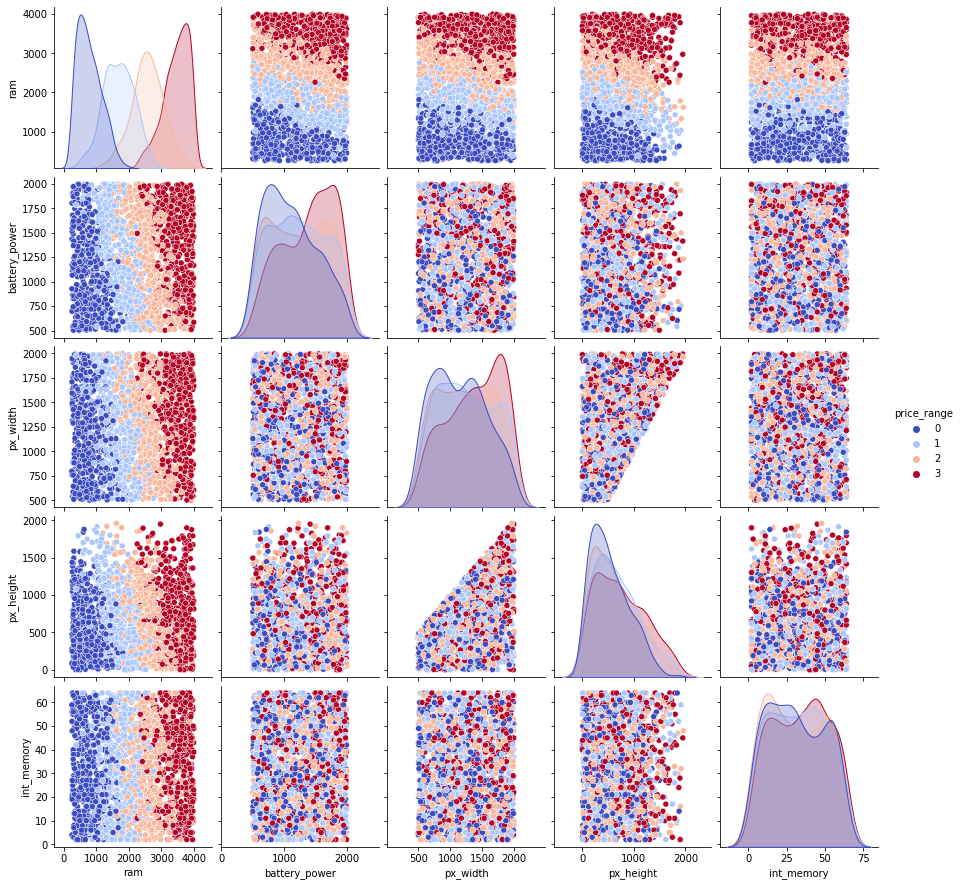

In [6]:
sns.pairplot(data[corr_matrix_abs['price_range'].sort_values(
    ascending=False).index[:6]], hue='price_range', palette='coolwarm')
plt.show()


## Scatter Matrix to visualize the relation between various positively correlated features in our dataset (with respect to price range).

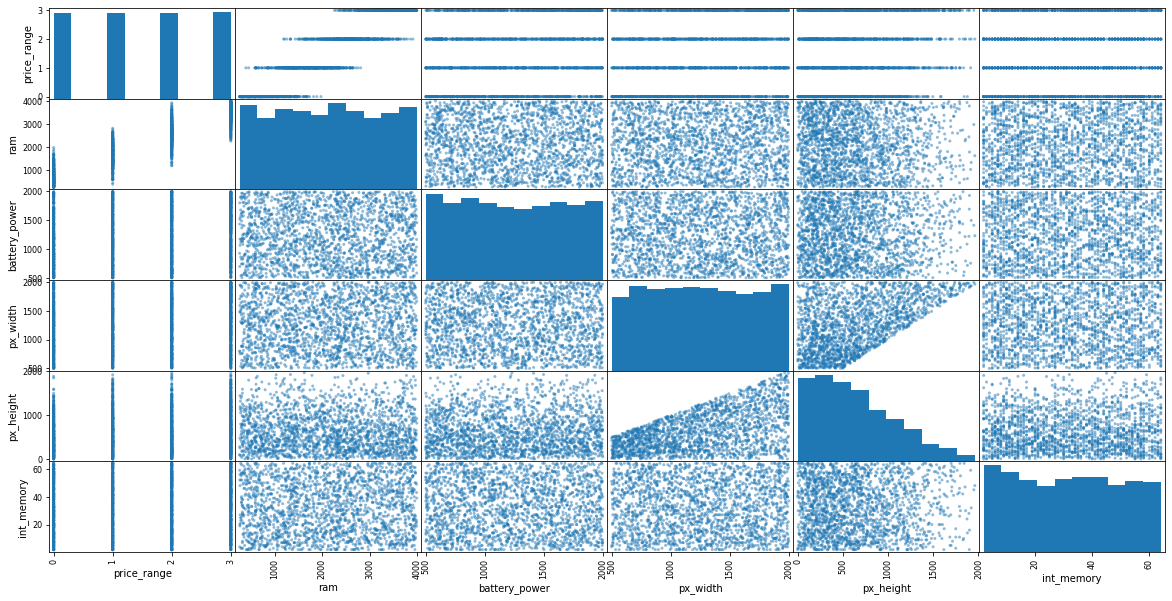

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price_range    1988 non-null   int64
 1   ram            1988 non-null   int64
 2   battery_power  1988 non-null   int64
 3   px_width       1988 non-null   int64
 4   px_height      1988 non-null   int64
 5   int_memory     1988 non-null   int64
dtypes: int64(6)
memory usage: 173.3 KB


In [18]:
highly_correlated_features = corr_matrix['price_range'].sort_values(ascending=False).index[:6]
scatter_matrix(data[highly_correlated_features], figsize=(20, 10))
plt.show()
data[highly_correlated_features].info()

## Visualizing the distribution of the price range

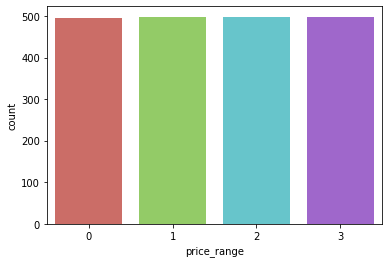

In [19]:
# visualizing the distribution of the price range
sns.countplot(x = "price_range", data = data, palette = "hls")
plt.show()

## Visualizing the relation between the count of phones in a range of ram values for every price range.

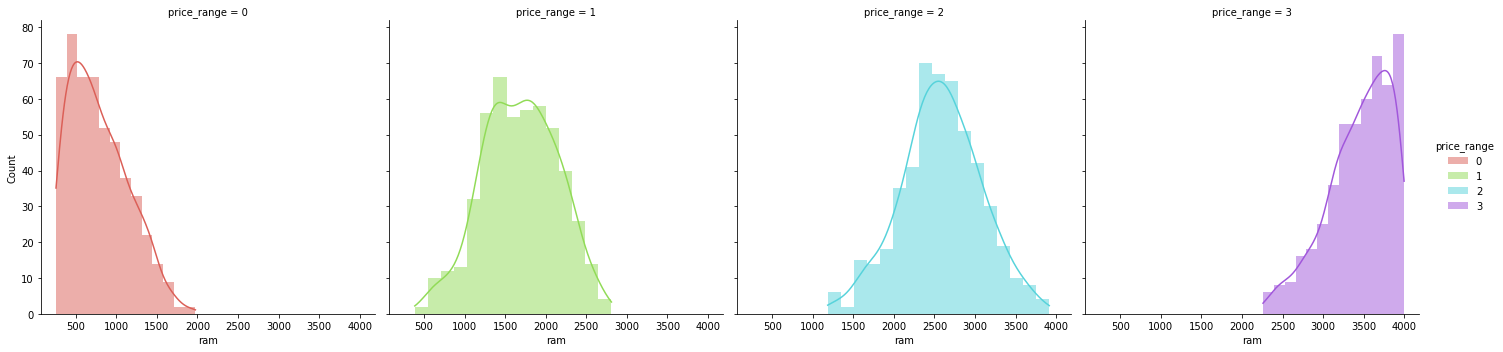

In [20]:
sns.FacetGrid(data, col="price_range", hue="price_range", palette="hls", height=5).map(
    sns.histplot, "ram", kde=True, linewidth=0).add_legend()
plt.show()

From the above histogram plots, we can see that the price range is almost equally distributed (by count) accross the classes we are attempting to classify and have a clear separation (very less overlap).

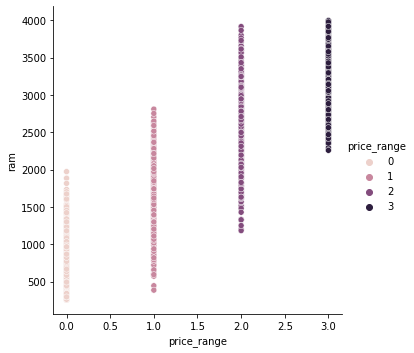

In [21]:
sns.relplot(x='price_range',y='ram',data=data,kind='scatter', hue='price_range')

We can also see the gradual increase in the ram as the price range increases.

## Relation between Battery Power, Ram and Price Range

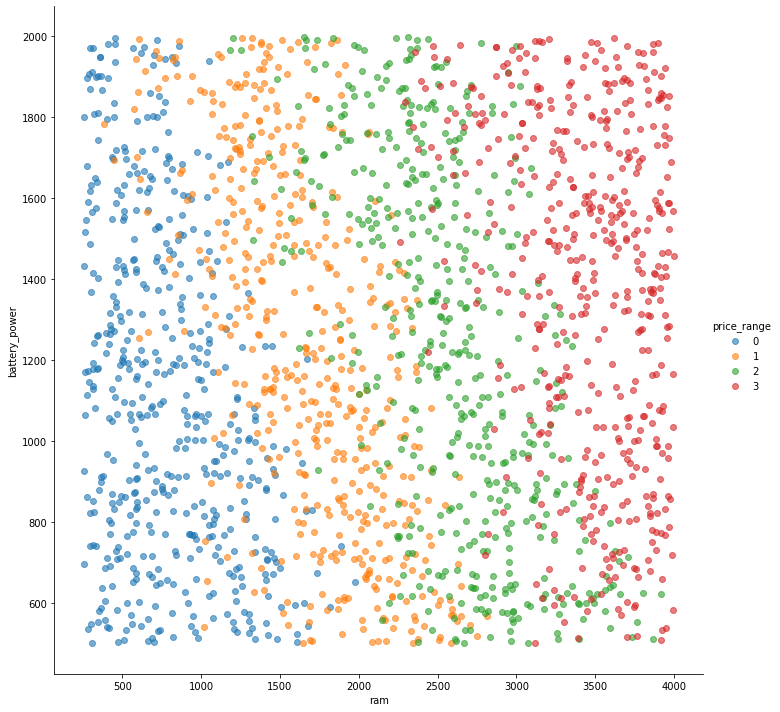

In [22]:
sns.FacetGrid(data, hue='price_range', height=10).map(
    plt.scatter, 'ram', 'battery_power', alpha=0.6).add_legend()
plt.show()

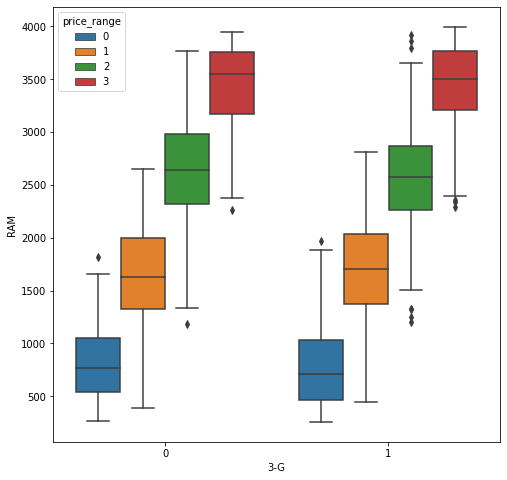

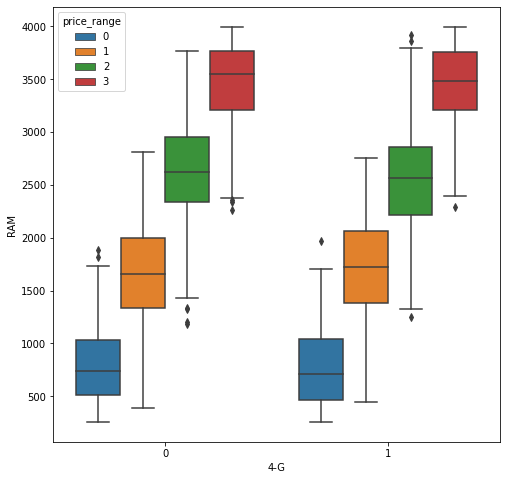

In [23]:
# 3G related to ram and price range
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x="three_g", y="ram", hue="price_range")
plt.xlabel("3-G")
plt.ylabel("RAM")
plt.show()

# 4G related to ram and price range
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x="four_g", y="ram", hue="price_range")
plt.xlabel("4-G")
plt.ylabel("RAM")
plt.show()

Here 0 stands for has NO 3G/4G and 1 represents that the phone HAS 3G/4G

## Cleaning the Data

In [24]:
# To check for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
# calculate the sum of duplicate rows
print(data.duplicated().sum())

0


The above results show that there are no null/duplicate values in the data set, also all values are numeric.

However, on further inspection of the data, I found out that some values for features like px_height (height of phone in pixels) and sc_w (width of the screen) were 0 which didn't really make sense, therefore, I decided to replace these "0" values with the median of the feature.

In [26]:
data[data['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [27]:
data['sc_w'].median()

5.0

In [28]:
data[data['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [29]:
data[data['sc_w'] == 0].shape[0]

180

There are 180 rows in the dataset where the sc_w feature is 0, therefore, I replaced these values with the median of the feature.

In [30]:
data['sc_w'] = data['sc_w'].replace(0,data['sc_w'].mean())

In [31]:
data[data['sc_w'] == 0].shape[0]

0

In [32]:
data['px_height'].median()

564.0

In [33]:
data[data['px_height'] == 0].shape[0]

2

There are 2 rows in the dataset where the px_height feature is 0, therefore, I replaced these values with the median of the feature.

In [34]:
data['px_height'] = data['px_height'].replace(0,data['px_height'].median())

In [35]:
data[data['px_height'] == 0].shape[0]

0

# GaussianNB

## Splitting the data into testing and training data sets using the train_test_split function from sklearn

In [36]:
features = data.drop(columns=['price_range'])
target = data['price_range']

The Variance Inflation Factor is a measure to test collinearity of the data.

If the vif value is over 5, then the data is not suitable for training the model.

In [37]:
vif=pd.DataFrame()
vif['features']=features.columns
vif['vif']=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
8,mobile_wt,12.965438
12,px_width,11.752508
14,sc_h,11.596572
0,battery_power,8.063261
17,three_g,6.178244
10,pc,6.132723
16,talk_time,4.865577
15,sc_w,4.717619
13,ram,4.704240
9,n_cores,4.652279


As we can see, the VIF for the features is very high. So, we need to scale the features which have high VIF.

In [38]:
scale = StandardScaler()
X_scaled=scale.fit_transform(features)

In [39]:
vif=pd.DataFrame()
vif['features']=features.columns
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
10,pc,1.697049
4,fc,1.695222
5,four_g,1.530114
17,three_g,1.528953
11,px_height,1.365827
12,px_width,1.359660
14,sc_h,1.344472
15,sc_w,1.340456
3,dual_sim,1.012172
1,blue,1.011162


We can see how the vif values have clearly been affected by the scaling of the features.

### Since,VIF is less than 5.
### So, There is no multicollinearity.

Thus we can now used the scaled dataset (X_scaled) to train our model.

In [40]:
# splitting data into train and test

# data['ram_core'] = data['ram'] / data['n_cores']

X_scaled = pd.DataFrame(X_scaled,columns=[features.columns])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=0, stratify=target)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

cols = features.columns
cols


(1491, 20)
(497, 20)
(1491,)
(497,)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

## Running naive bayes on the training data without Feature Engineering

In [41]:
# Running naive bayes on the training data

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = model.predict(X_test)


# Generating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


In [42]:
# https://stackoverflow.com/a/59326862

# A custom function to plot the ROC curve and calculate the AUC

def plot_multiclass_roc(y_prob, X_test, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
# Function to calculate various metrics using the confusion matrix and a library called pycm

def metrics(y_test, y_pred ,cnf_matrix, model, X_test=X_test):

    n_classes = len(y_test.unique())
    y_prob = model.predict_proba(X_test)

    cm = ConfusionMatrix(np.array(y_test), np.array(y_pred))
    metric_strings = []
    # Model Accuracy, how often is the classifier correct?
    metric_strings.append(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

    # Model Precision
    metric_strings.append(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Precision (micro): {precision_score(y_test, y_pred, average='micro'):.3f}")

    # Model Recall
    metric_strings.append(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Recall (micro): {recall_score(y_test, y_pred, average='micro'):.3f}")

    # Model F1 Score
    metric_strings.append(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"F1 Score (micro): {f1_score(y_test, y_pred, average='micro'):.3f}")

    # Mean Squared Error
    metric_strings.append(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

    # Mean Absolute Error
    metric_strings.append(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")

    metrics = cm.class_stat
    
    table_metrics = 'TPR FPR TNR FNR ERR ACC F1 AUC'.split()

    markdown = '| Metric | 0 | 1 | 2 | 3 |\n| ----------- | ----------- | ----------- | ----------- | ----------- |\n'
    for metric in table_metrics:
        markdown += '| ' + metric + ' | '
        for i in range(n_classes):
            markdown += f'{metrics[metric][i]:.3f} | '
        markdown += '\n'

    # ROC AUC Score
    metric_strings.append(f"ROC AUC Score: {roc_auc_score(y_test, y_prob, multi_class='ovo'):.3f}")

    output = ""
    for metric in metric_strings:
        output += "## " + metric + "\n"
    
    printmd(output)

    # Model Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Model Confusion Matrix
    print("Confusion Matrix:\n", cnf_matrix)

    printmd(markdown)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cnf_matrix)
    plt.show()

    plot_multiclass_roc(y_prob, X_test, y_test, n_classes=n_classes, figsize=(8, 8))

## Accuracy: 0.831
## Precision (weighted): 0.833
## Precision (macro): 0.833
## Precision (micro): 0.831
## Recall (weighted): 0.831
## Recall (macro): 0.831
## Recall (micro): 0.831
## F1 Score (weighted): 0.832
## F1 Score (macro): 0.831
## F1 Score (micro): 0.831
## Mean Squared Error: 0.169
## Mean Absolute Error: 0.169
## ROC AUC Score: 0.957


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       124
           1       0.73      0.78      0.75       124
           2       0.76      0.73      0.75       124
           3       0.91      0.93      0.92       125

    accuracy                           0.83       497
   macro avg       0.83      0.83      0.83       497
weighted avg       0.83      0.83      0.83       497

Confusion Matrix:
 [[109  15   0   0]
 [  8  97  19   0]
 [  0  21  91  12]
 [  0   0   9 116]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.879 | 0.782 | 0.734 | 0.928 | 
| FPR | 0.021 | 0.097 | 0.075 | 0.032 | 
| TNR | 0.979 | 0.903 | 0.925 | 0.968 | 
| FNR | 0.121 | 0.218 | 0.266 | 0.072 | 
| ERR | 0.046 | 0.127 | 0.123 | 0.042 | 
| ACC | 0.954 | 0.873 | 0.877 | 0.958 | 
| F1 | 0.905 | 0.755 | 0.749 | 0.917 | 
| AUC | 0.929 | 0.843 | 0.829 | 0.948 | 


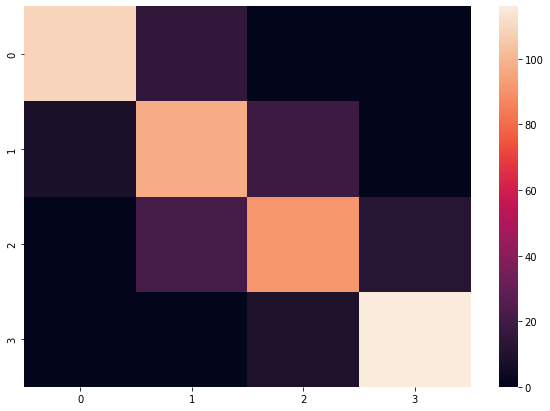

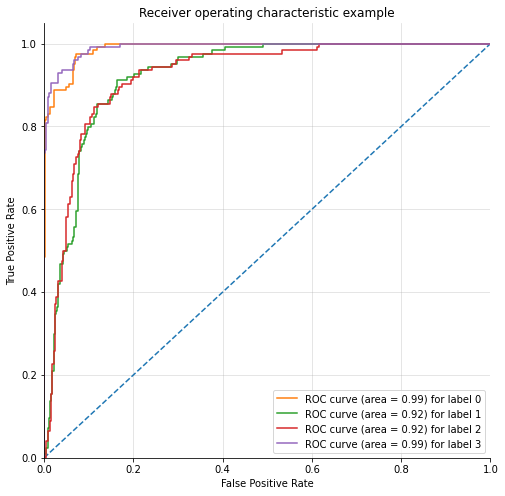

In [43]:
metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model)

## Running Gaussian Naive Bayes after Feature Engineering

### Feature Selection

#### Recursive feature elimination (RFE) with RandomForestClassifier (OLD METHOD)


#### New feature selection method uses a loop over the highly correlated features to find the features that give the highest accuracy. (NEW METHOD)

## For 21 selected features, the accuracy score is 0.831

## For 20 selected features, the accuracy score is 0.831

## For 19 selected features, the accuracy score is 0.829

## For 18 selected features, the accuracy score is 0.829

## For 17 selected features, the accuracy score is 0.823

## For 16 selected features, the accuracy score is 0.825

## For 15 selected features, the accuracy score is 0.827

## For 14 selected features, the accuracy score is 0.825

## For 13 selected features, the accuracy score is 0.823

## For 12 selected features, the accuracy score is 0.823

## For 11 selected features, the accuracy score is 0.819

## For 10 selected features, the accuracy score is 0.823

## For 9 selected features, the accuracy score is 0.819

## For 8 selected features, the accuracy score is 0.817

## For 7 selected features, the accuracy score is 0.819

## For 6 selected features, the accuracy score is 0.823

## For 5 selected features, the accuracy score is 0.817

## For 4 selected features, the accuracy score is 0.817

## For 3 selected features, the accuracy score is 0.809

## For 2 selected features, the accuracy score is 0.801

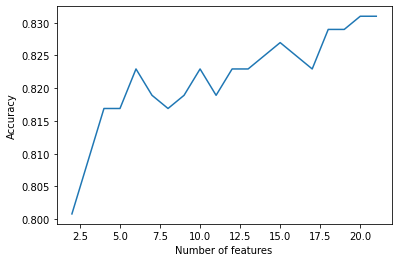

21
Chosen best 21 features by rfe:
 MultiIndex([('battery_power',),
            (         'blue',),
            (  'clock_speed',),
            (     'dual_sim',),
            (           'fc',),
            (       'four_g',),
            (   'int_memory',),
            (        'm_dep',),
            (    'mobile_wt',),
            (      'n_cores',),
            (           'pc',),
            (    'px_height',),
            (     'px_width',),
            (          'ram',),
            (         'sc_h',),
            (         'sc_w',),
            (    'talk_time',),
            (      'three_g',),
            ( 'touch_screen',),
            (         'wifi',)],
           )


## Accuracy: 0.831
## Precision (weighted): 0.833
## Precision (macro): 0.833
## Precision (micro): 0.831
## Recall (weighted): 0.831
## Recall (macro): 0.831
## Recall (micro): 0.831
## F1 Score (weighted): 0.832
## F1 Score (macro): 0.831
## F1 Score (micro): 0.831
## Mean Squared Error: 0.169
## Mean Absolute Error: 0.169
## ROC AUC Score: 0.957


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       124
           1       0.73      0.78      0.75       124
           2       0.76      0.73      0.75       124
           3       0.91      0.93      0.92       125

    accuracy                           0.83       497
   macro avg       0.83      0.83      0.83       497
weighted avg       0.83      0.83      0.83       497

Confusion Matrix:
 [[109  15   0   0]
 [  8  97  19   0]
 [  0  21  91  12]
 [  0   0   9 116]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.879 | 0.782 | 0.734 | 0.928 | 
| FPR | 0.021 | 0.097 | 0.075 | 0.032 | 
| TNR | 0.979 | 0.903 | 0.925 | 0.968 | 
| FNR | 0.121 | 0.218 | 0.266 | 0.072 | 
| ERR | 0.046 | 0.127 | 0.123 | 0.042 | 
| ACC | 0.954 | 0.873 | 0.877 | 0.958 | 
| F1 | 0.905 | 0.755 | 0.749 | 0.917 | 
| AUC | 0.929 | 0.843 | 0.829 | 0.948 | 


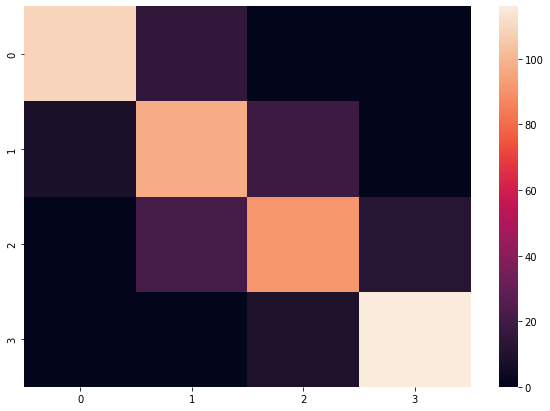

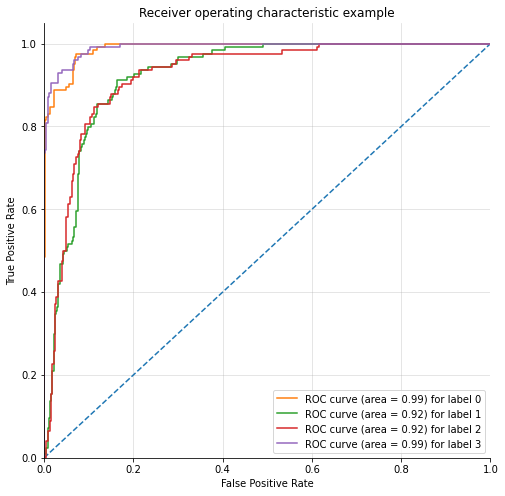

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

accuracy_scores = []
number_of_features = []

for i in range(len(features.columns)+1, 1, -1):
    # rfe = RFE(estimator=clf_rf, n_features_to_select=i, step=1)
    # rfe = rfe.fit(X_train, y_train)

    # print(f'Chosen best {i} feature by rfe:', X_train.columns[rfe.support_])
    
    features_selected = corr_matrix_abs['price_range'].abs().nlargest(i+1)[1:].index

    # X_train_pick = X_train[X_train.columns[rfe.support_]]
    # X_test_pick = X_test[X_train.columns[rfe.support_]]
    
    X_train_pick = X_train[features_selected]
    X_test_pick = X_test[features_selected]

    # Train the model using the training sets
    model.fit(X_train_pick, y_train)

    # Predict the response for test dataset
    y_pred = model.predict(X_test_pick)

    current_accuracy = accuracy_score(y_test, y_pred)
    printmd(f'## For {i} selected features, the accuracy score is {current_accuracy:.3f}')
    number_of_features.append(i)
    accuracy_scores.append(current_accuracy)


plt.plot(number_of_features, accuracy_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

highest_accuracy_feature_count = number_of_features[accuracy_scores.index(max(accuracy_scores))]
print(highest_accuracy_feature_count)

rfe = RFE(estimator=clf_rf, n_features_to_select=highest_accuracy_feature_count, step=1)
rfe = rfe.fit(X_train, y_train)

print(f'Chosen best {highest_accuracy_feature_count} features by rfe:\n', X_train.columns[rfe.support_])

X_train_pick = X_train[X_train.columns[rfe.support_]]
X_test_pick = X_test[X_train.columns[rfe.support_]]

# Train the model using the training sets
model.fit(X_train_pick, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test_pick)

# accuracy_scores.append(current_accuracy)
cnf_matrix = confusion_matrix(y_test, y_pred)

metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix,
        model=model, X_test=X_test_pick)


# SVC

## Testing with SVC classifier

In [45]:
# Running SVC
svc = SVC(kernel='linear', probability=True)
# model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
svc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svc.predict(X_test)

y_train_pred = svc.predict(X_train)

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[120,   4,   0,   0],
       [  6, 113,   5,   0],
       [  0,   1, 120,   3],
       [  0,   0,   3, 122]])

## Accuracy: 0.956
## Precision (weighted): 0.956
## Precision (macro): 0.956
## Precision (micro): 0.956
## Recall (weighted): 0.956
## Recall (macro): 0.956
## Recall (micro): 0.956
## F1 Score (weighted): 0.956
## F1 Score (macro): 0.956
## F1 Score (micro): 0.956
## Mean Squared Error: 0.044
## Mean Absolute Error: 0.044
## ROC AUC Score: 0.998


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.96      0.91      0.93       124
           2       0.94      0.97      0.95       124
           3       0.98      0.98      0.98       125

    accuracy                           0.96       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497

Confusion Matrix:
 [[120   4   0   0]
 [  6 113   5   0]
 [  0   1 120   3]
 [  0   0   3 122]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.968 | 0.911 | 0.968 | 0.976 | 
| FPR | 0.016 | 0.013 | 0.021 | 0.008 | 
| TNR | 0.984 | 0.987 | 0.979 | 0.992 | 
| FNR | 0.032 | 0.089 | 0.032 | 0.024 | 
| ERR | 0.020 | 0.032 | 0.024 | 0.012 | 
| ACC | 0.980 | 0.968 | 0.976 | 0.988 | 
| F1 | 0.960 | 0.934 | 0.952 | 0.976 | 
| AUC | 0.976 | 0.949 | 0.973 | 0.984 | 


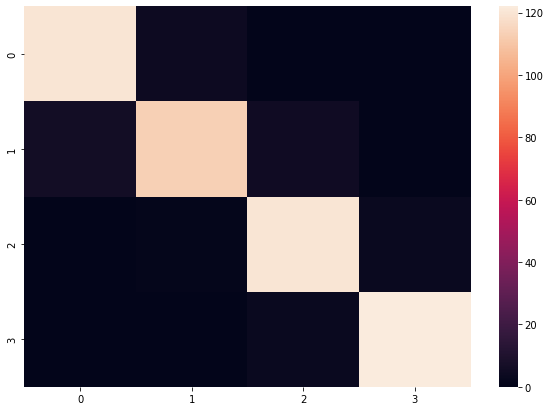

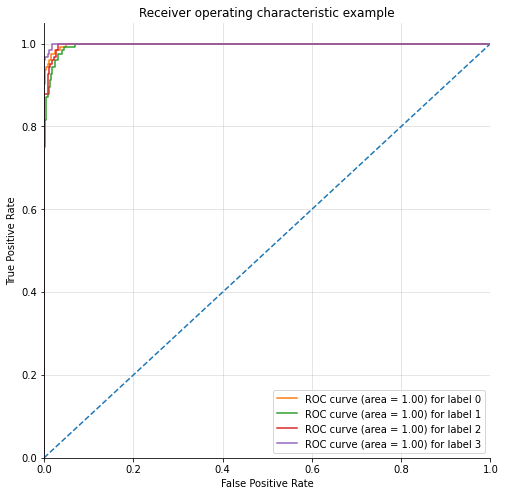

In [46]:
metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=svc, X_test=X_test)

## SVC Feature Selection using Recursive Feature Elemination using Cross Validation

Optimal number of features : 5


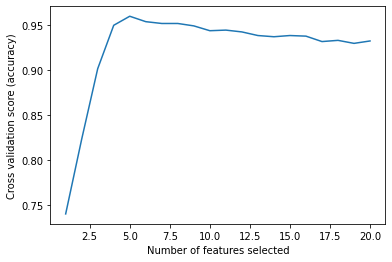

MultiIndex([('battery_power',),
            (    'mobile_wt',),
            (    'px_height',),
            (     'px_width',),
            (          'ram',)],
           )

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

X_train_pick_cv = X_train[X_train.columns[rfecv.support_]]
X_test_pick_cv = X_test[X_train.columns[rfecv.support_]]

X_train.columns[rfecv.support_]

In [48]:
# Running SVC
svc = SVC(kernel='linear', probability=True)
# model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
svc.fit(X_train_pick_cv, y_train)


# Predict the response for test dataset
y_pred = svc.predict(X_test_pick_cv)


cnf_matrix = confusion_matrix(y_test, y_pred)

## Accuracy: 0.984
## Precision (weighted): 0.984
## Precision (macro): 0.984
## Precision (micro): 0.984
## Recall (weighted): 0.984
## Recall (macro): 0.984
## Recall (micro): 0.984
## F1 Score (weighted): 0.984
## F1 Score (macro): 0.984
## F1 Score (micro): 0.984
## Mean Squared Error: 0.016
## Mean Absolute Error: 0.016
## ROC AUC Score: 0.999


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       124
           1       0.98      0.96      0.97       124
           2       0.98      0.98      0.98       124
           3       1.00      1.00      1.00       125

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497

Confusion Matrix:
 [[123   1   0   0]
 [  3 119   2   0]
 [  0   2 122   0]
 [  0   0   0 125]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.992 | 0.960 | 0.984 | 1.000 | 
| FPR | 0.008 | 0.008 | 0.005 | 0.000 | 
| TNR | 0.992 | 0.992 | 0.995 | 1.000 | 
| FNR | 0.008 | 0.040 | 0.016 | 0.000 | 
| ERR | 0.008 | 0.016 | 0.008 | 0.000 | 
| ACC | 0.992 | 0.984 | 0.992 | 1.000 | 
| F1 | 0.984 | 0.967 | 0.984 | 1.000 | 
| AUC | 0.992 | 0.976 | 0.989 | 1.000 | 


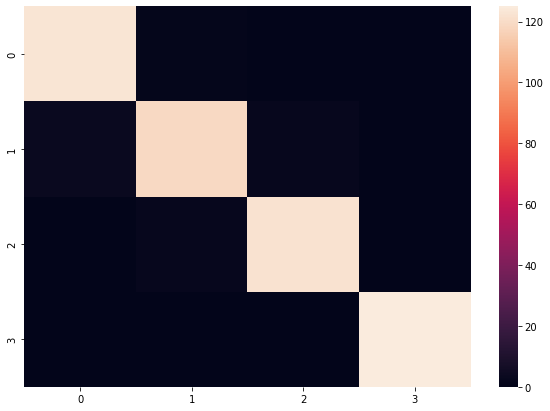

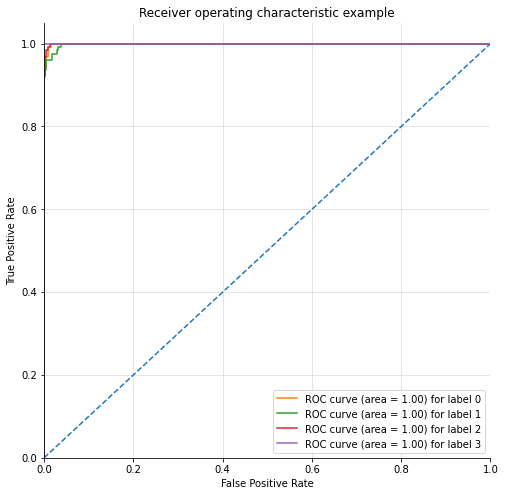

In [49]:
metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=svc, X_test=X_test_pick_cv)

# DecisionTreeClassifier

## Accuracy: 0.812
## Precision (weighted): 0.814
## Precision (macro): 0.814
## Precision (micro): 0.812
## Recall (weighted): 0.812
## Recall (macro): 0.812
## Recall (micro): 0.812
## F1 Score (weighted): 0.813
## F1 Score (macro): 0.813
## F1 Score (micro): 0.812
## Mean Squared Error: 0.188
## Mean Absolute Error: 0.188
## ROC AUC Score: 0.874


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        99
           1       0.72      0.77      0.74       100
           2       0.77      0.76      0.76        99
           3       0.91      0.87      0.89       100

    accuracy                           0.81       398
   macro avg       0.81      0.81      0.81       398
weighted avg       0.81      0.81      0.81       398

Confusion Matrix:
 [[84 15  0  0]
 [13 77 10  0]
 [ 0 15 75  9]
 [ 0  0 13 87]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.848 | 0.770 | 0.758 | 0.870 | 
| FPR | 0.043 | 0.101 | 0.077 | 0.030 | 
| TNR | 0.957 | 0.899 | 0.923 | 0.970 | 
| FNR | 0.152 | 0.230 | 0.242 | 0.130 | 
| ERR | 0.070 | 0.133 | 0.118 | 0.055 | 
| ACC | 0.930 | 0.867 | 0.882 | 0.945 | 
| F1 | 0.857 | 0.744 | 0.761 | 0.888 | 
| AUC | 0.903 | 0.835 | 0.840 | 0.920 | 


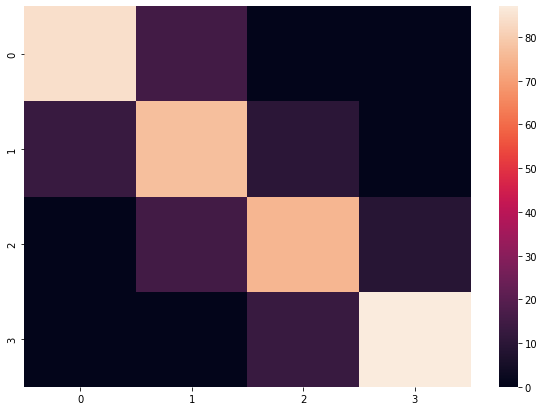

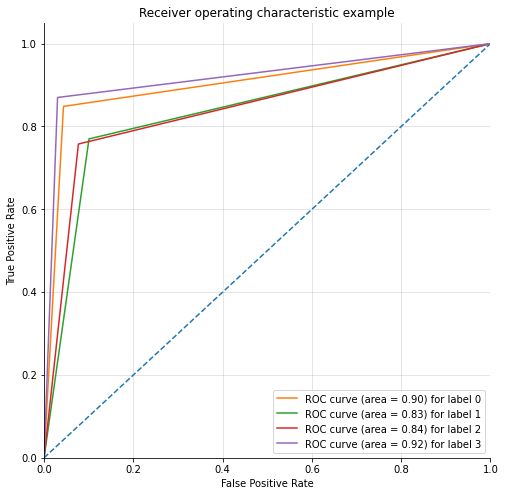

In [50]:
from sklearn.tree import DecisionTreeClassifier

y = data['price_range']
X = data.drop("price_range", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = model.predict(X_test)


cnf_matrix = confusion_matrix(y_test, y_pred)


metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X_test)

Optimal number of features : 4


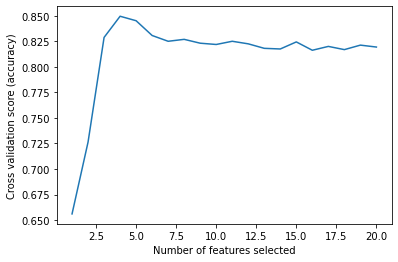

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

In [51]:
dtc = DecisionTreeClassifier(max_depth=20, random_state=0)

# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

X_train_pick_cv = X_train[X_train.columns[rfecv.support_]]
X_test_pick_cv = X_test[X_train.columns[rfecv.support_]]

X_train.columns[rfecv.support_]

## Accuracy: 0.882
## Precision (weighted): 0.882
## Precision (macro): 0.882
## Precision (micro): 0.882
## Recall (weighted): 0.882
## Recall (macro): 0.882
## Recall (micro): 0.882
## F1 Score (weighted): 0.882
## F1 Score (macro): 0.882
## F1 Score (micro): 0.882
## Mean Squared Error: 0.118
## Mean Absolute Error: 0.118
## ROC AUC Score: 0.921


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.84      0.85      0.85       100
           2       0.84      0.82      0.83        99
           3       0.93      0.91      0.92       100

    accuracy                           0.88       398
   macro avg       0.88      0.88      0.88       398
weighted avg       0.88      0.88      0.88       398

Confusion Matrix:
 [[94  5  0  0]
 [ 9 85  6  0]
 [ 0 11 81  7]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.949 | 0.850 | 0.818 | 0.910 | 
| FPR | 0.030 | 0.054 | 0.050 | 0.023 | 
| TNR | 0.970 | 0.946 | 0.950 | 0.977 | 
| FNR | 0.051 | 0.150 | 0.182 | 0.090 | 
| ERR | 0.035 | 0.078 | 0.083 | 0.040 | 
| ACC | 0.965 | 0.922 | 0.917 | 0.960 | 
| F1 | 0.931 | 0.846 | 0.831 | 0.919 | 
| AUC | 0.960 | 0.898 | 0.884 | 0.943 | 


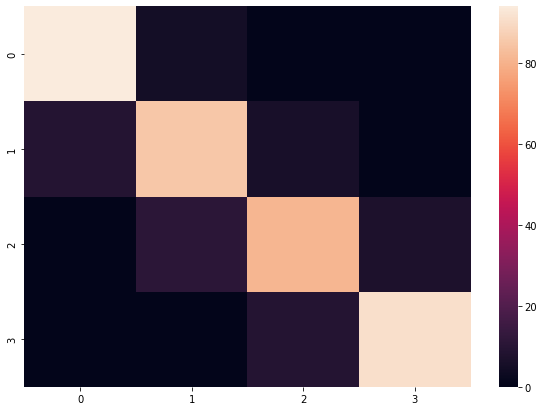

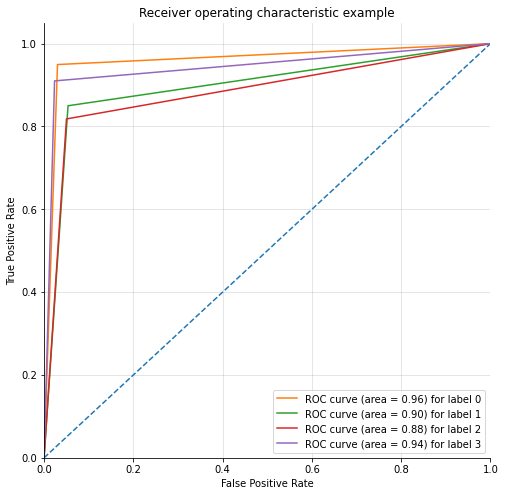

In [52]:
model = DecisionTreeClassifier(max_depth=20, random_state=0)
model.fit(X_train_pick_cv, y_train)


# Predict the response for test dataset
y_pred = model.predict(X_test_pick_cv)


cnf_matrix = confusion_matrix(y_test, y_pred)


metrics(y_test=y_test, y_pred=y_pred, cnf_matrix=cnf_matrix, model=model, X_test=X_test_pick_cv)

## Creating new datasets for each class of the target variable

In [53]:
# one hot encode target
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
target_encoded = encoder.fit_transform(target.values.reshape(-1, 1)).toarray()
target_encoded

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [54]:
data_sets = []
for class_name in encoder.categories_[0]:
    data_copy = data.copy()
    data_copy['price_range'] = target_encoded[:, int(class_name)]
    data_sets.append(data_copy)
# data_test = data['price_range'] = target_encoded

In [55]:
for data_set in data_sets:
    print(data_set.shape)

(1988, 21)
(1988, 21)
(1988, 21)
(1988, 21)


After one hot encoding, I was successfully able to create new datasets for each class of the target variable.

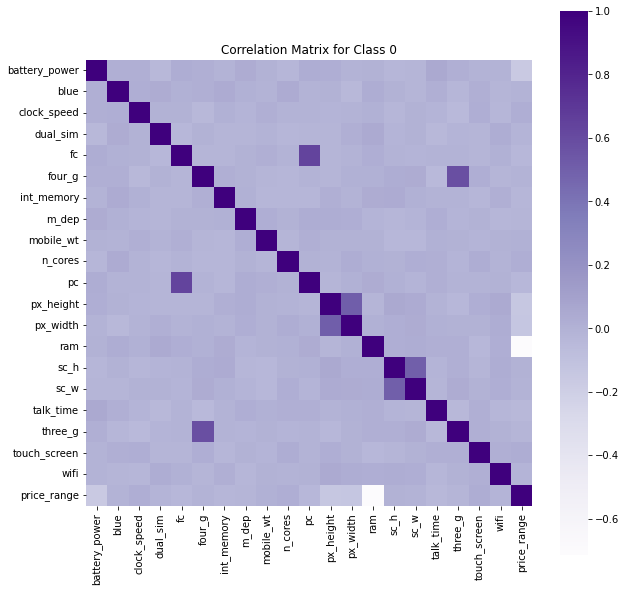

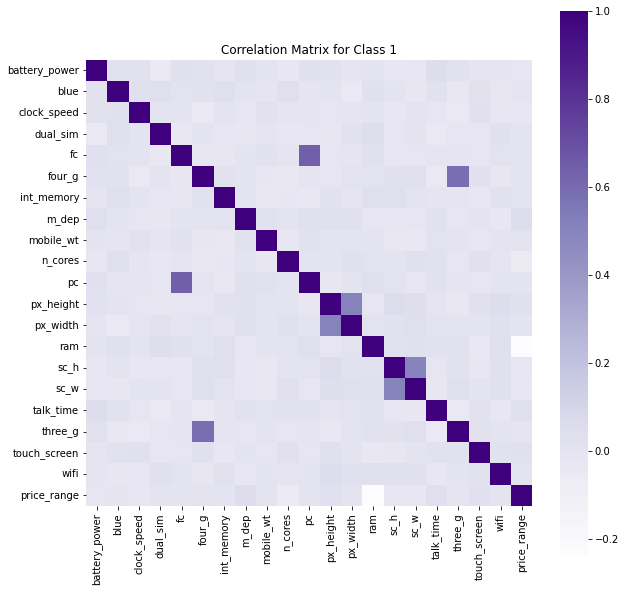

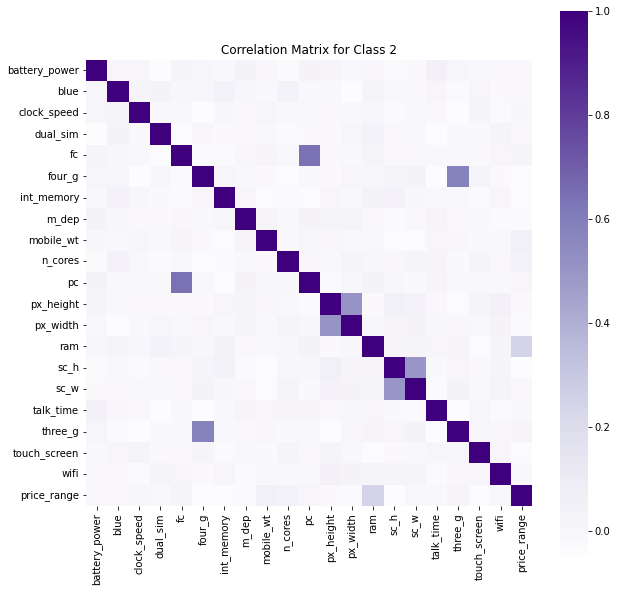

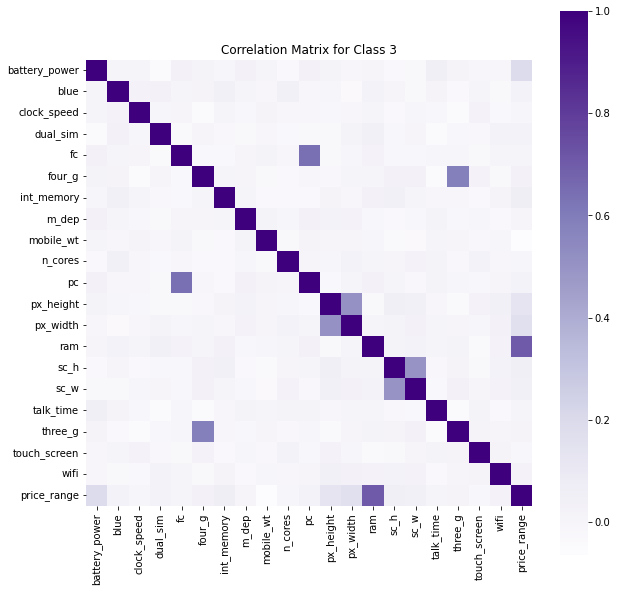

In [56]:
corr_matrices = []
corr_matrices_abs = []
for class_name, data_set in enumerate(data_sets):
    corr_matrices.append(data_set.corr())
    corr_matrices_abs.append(data_set.corr().abs())
    plt.figure(figsize=(10,10))
    sns.heatmap(data_set.corr(), square=True, cmap='Purples')
    plt.title("Correlation Matrix for Class {}".format(class_name))
    plt.show()

### Class 0

In [57]:
print(corr_matrices[0]['price_range'].sort_values(ascending=False))

price_range      1.000000
touch_screen     0.024999
clock_speed      0.019534
n_cores          0.016768
mobile_wt        0.005423
sc_h             0.002498
sc_w            -0.003846
four_g          -0.005187
blue            -0.008729
dual_sim        -0.012768
wifi            -0.012776
m_dep           -0.020148
three_g         -0.022444
int_memory      -0.025282
pc              -0.034993
fc              -0.035068
talk_time       -0.040303
px_width        -0.134772
px_height       -0.142258
battery_power   -0.159446
ram             -0.712942
Name: price_range, dtype: float64


In [58]:
print(corr_matrices_abs[0]['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.712942
battery_power    0.159446
px_height        0.142258
px_width         0.134772
talk_time        0.040303
fc               0.035068
pc               0.034993
int_memory       0.025282
touch_screen     0.024999
three_g          0.022444
m_dep            0.020148
clock_speed      0.019534
n_cores          0.016768
wifi             0.012776
dual_sim         0.012768
blue             0.008729
mobile_wt        0.005423
four_g           0.005187
sc_w             0.003846
sc_h             0.002498
Name: price_range, dtype: float64


### Class 1

In [59]:
print(corr_matrices[1]['price_range'].sort_values(ascending=False))

price_range      1.000000e+00
m_dep            4.391021e-02
talk_time        3.442642e-02
px_height        2.754989e-02
touch_screen     2.149118e-02
mobile_wt        5.775134e-03
four_g           5.231970e-03
fc               4.267822e-03
pc               6.738107e-04
dual_sim        -3.727883e-17
px_width        -2.063280e-03
wifi            -2.323459e-03
int_memory      -2.451713e-03
blue            -5.227732e-03
three_g         -5.444400e-03
sc_h            -1.495305e-02
battery_power   -1.503219e-02
clock_speed     -2.517932e-02
sc_w            -2.788588e-02
n_cores         -5.505419e-02
ram             -2.362511e-01
Name: price_range, dtype: float64


In [60]:
print(corr_matrices_abs[1]['price_range'].sort_values(ascending=False))

price_range      1.000000e+00
ram              2.362511e-01
n_cores          5.505419e-02
m_dep            4.391021e-02
talk_time        3.442642e-02
sc_w             2.788588e-02
px_height        2.754989e-02
clock_speed      2.517932e-02
touch_screen     2.149118e-02
battery_power    1.503219e-02
sc_h             1.495305e-02
mobile_wt        5.775134e-03
three_g          5.444400e-03
four_g           5.231970e-03
blue             5.227732e-03
fc               4.267822e-03
int_memory       2.451713e-03
wifi             2.323459e-03
px_width         2.063280e-03
pc               6.738107e-04
dual_sim         3.727883e-17
Name: price_range, dtype: float64


### Class 2

In [61]:
print(corr_matrices[2]['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.242875
mobile_wt        0.052699
n_cores          0.041354
fc               0.026020
three_g          0.016333
pc               0.009722
clock_speed      0.007397
talk_time       -0.001756
wifi            -0.004647
blue            -0.009875
sc_w            -0.010919
dual_sim        -0.011619
battery_power   -0.012880
px_height       -0.018929
m_dep           -0.023365
px_width        -0.024494
int_memory      -0.033282
four_g          -0.034298
touch_screen    -0.036593
sc_h            -0.040311
Name: price_range, dtype: float64


In [62]:
print(corr_matrices_abs[2]['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.242875
mobile_wt        0.052699
n_cores          0.041354
sc_h             0.040311
touch_screen     0.036593
four_g           0.034298
int_memory       0.033282
fc               0.026020
px_width         0.024494
m_dep            0.023365
px_height        0.018929
three_g          0.016333
battery_power    0.012880
dual_sim         0.011619
sc_w             0.010919
blue             0.009875
pc               0.009722
clock_speed      0.007397
wifi             0.004647
talk_time        0.001756
Name: price_range, dtype: float64


### Class 3

In [63]:
print(corr_matrices[3]['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.705366
battery_power    0.187126
px_width         0.161131
px_height        0.133452
int_memory       0.060958
sc_h             0.052732
sc_w             0.042620
four_g           0.034228
pc               0.024557
dual_sim         0.024362
blue             0.023810
wifi             0.019725
three_g          0.011533
talk_time        0.007601
fc               0.004753
m_dep           -0.000411
clock_speed     -0.001737
n_cores         -0.003055
touch_screen    -0.009874
mobile_wt       -0.063850
Name: price_range, dtype: float64


In [64]:
print(corr_matrices_abs[3]['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.705366
battery_power    0.187126
px_width         0.161131
px_height        0.133452
mobile_wt        0.063850
int_memory       0.060958
sc_h             0.052732
sc_w             0.042620
four_g           0.034228
pc               0.024557
dual_sim         0.024362
blue             0.023810
wifi             0.019725
three_g          0.011533
touch_screen     0.009874
talk_time        0.007601
fc               0.004753
n_cores          0.003055
clock_speed      0.001737
m_dep            0.000411
Name: price_range, dtype: float64


## Calculating which features give the best accuracy for each class and the whole dataset and saving the ones that give the best accuracy.

In [65]:
best_features_per_class_encoded = []
best_features_per_class = []
for index,data_set in enumerate(data_sets):
    printmd(f"# Data Set {index}")
    y_encoded = data_set['price_range']
    X = data_set.drop("price_range", axis=1)
    accuracy_scores = []
    accuracy_scores_main = []
    selected_features = []
    for i in range(len(cols), 1,-1):
        current_features = corr_matrices_abs[index]['price_range'].sort_values(ascending=False)[1:i].index
        X_selected = X[current_features]
        X_tr, X_te, y_tr, y_te = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)
        model = GaussianNB()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        accuracy_scores.append((i, format(accuracy_score(y_te, y_pred), '.3f')))
        X_selected = X[current_features]
        X_tr, X_te, y_tr, y_te = train_test_split(X_selected, y, test_size=0.2, random_state=0, stratify=y)
        model = GaussianNB()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        accuracy_scores_main.append((i, format(accuracy_score(y_te, y_pred), '.3f')))
        selected_features.append(current_features)
    printmd('---')
    print(*accuracy_scores, sep = ' | ')
    max_accuracy = max(accuracy_scores, key=lambda x: x[1])
    best_selected_features = selected_features[accuracy_scores.index(max_accuracy)]
    printmd(f"\n### Maximum accuracy (Encoded): {max_accuracy[1]}\n")
    printmd(f"\n### Selected features (Encoded): {len(best_selected_features)}\n")
    print(*best_selected_features, sep = ', ')
    best_features_per_class_encoded.append(best_selected_features)
    printmd('---')
    print(*accuracy_scores_main, sep = ' | ')
    max_accuracy = max(accuracy_scores_main, key=lambda x: x[1])
    best_selected_features = selected_features[accuracy_scores_main.index(max_accuracy)]
    printmd(f"\n\n### Maximum accuracy: {max_accuracy[1]}\n")
    printmd(f"\n### Selected features: {len(best_selected_features)}\n")
    print(*best_selected_features, sep = ', ')
    printmd('---')
    best_features_per_class.append(best_selected_features)

# Data Set 0

---

(20, '0.957') | (19, '0.955') | (18, '0.957') | (17, '0.955') | (16, '0.962') | (15, '0.962') | (14, '0.960') | (13, '0.960') | (12, '0.960') | (11, '0.960') | (10, '0.962') | (9, '0.960') | (8, '0.957') | (7, '0.960') | (6, '0.957') | (5, '0.960') | (4, '0.952') | (3, '0.927') | (2, '0.917')



### Maximum accuracy (Encoded): 0.962



### Selected features (Encoded): 15


ram, battery_power, px_height, px_width, talk_time, fc, pc, int_memory, touch_screen, three_g, m_dep, clock_speed, n_cores, wifi, dual_sim


---

(20, '0.824') | (19, '0.822') | (18, '0.819') | (17, '0.812') | (16, '0.814') | (15, '0.809') | (14, '0.817') | (13, '0.814') | (12, '0.812') | (11, '0.812') | (10, '0.822') | (9, '0.812') | (8, '0.814') | (7, '0.812') | (6, '0.809') | (5, '0.812') | (4, '0.799') | (3, '0.789') | (2, '0.781')




### Maximum accuracy: 0.824



### Selected features: 19


ram, battery_power, px_height, px_width, talk_time, fc, pc, int_memory, touch_screen, three_g, m_dep, clock_speed, n_cores, wifi, dual_sim, blue, mobile_wt, four_g, sc_w


---

# Data Set 1

---

(20, '0.774') | (19, '0.774') | (18, '0.789') | (17, '0.794') | (16, '0.799') | (15, '0.779') | (14, '0.784') | (13, '0.781') | (12, '0.779') | (11, '0.781') | (10, '0.784') | (9, '0.791') | (8, '0.789') | (7, '0.781') | (6, '0.789') | (5, '0.776') | (4, '0.771') | (3, '0.776') | (2, '0.751')



### Maximum accuracy (Encoded): 0.799



### Selected features (Encoded): 15


ram, n_cores, m_dep, talk_time, sc_w, px_height, clock_speed, touch_screen, battery_power, sc_h, mobile_wt, three_g, four_g, blue, fc


---

(20, '0.824') | (19, '0.822') | (18, '0.802') | (17, '0.807') | (16, '0.817') | (15, '0.817') | (14, '0.814') | (13, '0.814') | (12, '0.817') | (11, '0.809') | (10, '0.814') | (9, '0.796') | (8, '0.791') | (7, '0.802') | (6, '0.784') | (5, '0.781') | (4, '0.779') | (3, '0.779') | (2, '0.781')




### Maximum accuracy: 0.824



### Selected features: 19


ram, n_cores, m_dep, talk_time, sc_w, px_height, clock_speed, touch_screen, battery_power, sc_h, mobile_wt, three_g, four_g, blue, fc, int_memory, wifi, px_width, pc


---

# Data Set 2

---

(20, '0.766') | (19, '0.774') | (18, '0.771') | (17, '0.769') | (16, '0.771') | (15, '0.779') | (14, '0.781') | (13, '0.774') | (12, '0.781') | (11, '0.769') | (10, '0.774') | (9, '0.764') | (8, '0.766') | (7, '0.759') | (6, '0.751') | (5, '0.756') | (4, '0.779') | (3, '0.766') | (2, '0.751')



### Maximum accuracy (Encoded): 0.781



### Selected features (Encoded): 13


ram, mobile_wt, n_cores, sc_h, touch_screen, four_g, int_memory, fc, px_width, m_dep, px_height, three_g, battery_power


---

(20, '0.824') | (19, '0.824') | (18, '0.824') | (17, '0.827') | (16, '0.829') | (15, '0.827') | (14, '0.822') | (13, '0.809') | (12, '0.804') | (11, '0.791') | (10, '0.794') | (9, '0.789') | (8, '0.789') | (7, '0.786') | (6, '0.789') | (5, '0.784') | (4, '0.779') | (3, '0.784') | (2, '0.781')




### Maximum accuracy: 0.829



### Selected features: 15


ram, mobile_wt, n_cores, sc_h, touch_screen, four_g, int_memory, fc, px_width, m_dep, px_height, three_g, battery_power, dual_sim, sc_w


---

# Data Set 3

---

(20, '0.950') | (19, '0.955') | (18, '0.955') | (17, '0.957') | (16, '0.957') | (15, '0.957') | (14, '0.957') | (13, '0.957') | (12, '0.957') | (11, '0.957') | (10, '0.957') | (9, '0.957') | (8, '0.950') | (7, '0.947') | (6, '0.945') | (5, '0.940') | (4, '0.922') | (3, '0.910') | (2, '0.902')



### Maximum accuracy (Encoded): 0.957



### Selected features (Encoded): 16


ram, battery_power, px_width, px_height, mobile_wt, int_memory, sc_h, sc_w, four_g, pc, dual_sim, blue, wifi, three_g, touch_screen, talk_time


---

(20, '0.819') | (19, '0.819') | (18, '0.822') | (17, '0.822') | (16, '0.819') | (15, '0.819') | (14, '0.814') | (13, '0.812') | (12, '0.812') | (11, '0.812') | (10, '0.812') | (9, '0.814') | (8, '0.814') | (7, '0.809') | (6, '0.812') | (5, '0.812') | (4, '0.804') | (3, '0.789') | (2, '0.781')




### Maximum accuracy: 0.822



### Selected features: 17


ram, battery_power, px_width, px_height, mobile_wt, int_memory, sc_h, sc_w, four_g, pc, dual_sim, blue, wifi, three_g, touch_screen, talk_time, fc


---

# Class 0

## Accuracy: 0.824
## Precision (weighted): 0.827
## Precision (macro): 0.827
## Precision (micro): 0.824
## Recall (weighted): 0.824
## Recall (macro): 0.824
## Recall (micro): 0.824
## F1 Score (weighted): 0.825
## F1 Score (macro): 0.825
## F1 Score (micro): 0.824
## Mean Squared Error: 0.176
## Mean Absolute Error: 0.176
## ROC AUC Score: 0.956


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.75      0.76      0.75       100
           2       0.75      0.77      0.76        99
           3       0.89      0.91      0.90       100

    accuracy                           0.82       398
   macro avg       0.83      0.82      0.82       398
weighted avg       0.83      0.82      0.82       398

Confusion Matrix:
 [[85 14  0  0]
 [ 7 76 17  0]
 [ 0 12 76 11]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.859 | 0.760 | 0.768 | 0.910 | 
| FPR | 0.023 | 0.087 | 0.087 | 0.037 | 
| TNR | 0.977 | 0.913 | 0.913 | 0.963 | 
| FNR | 0.141 | 0.240 | 0.232 | 0.090 | 
| ERR | 0.053 | 0.126 | 0.123 | 0.050 | 
| ACC | 0.947 | 0.874 | 0.877 | 0.950 | 
| F1 | 0.890 | 0.752 | 0.756 | 0.901 | 
| AUC | 0.918 | 0.836 | 0.840 | 0.937 | 


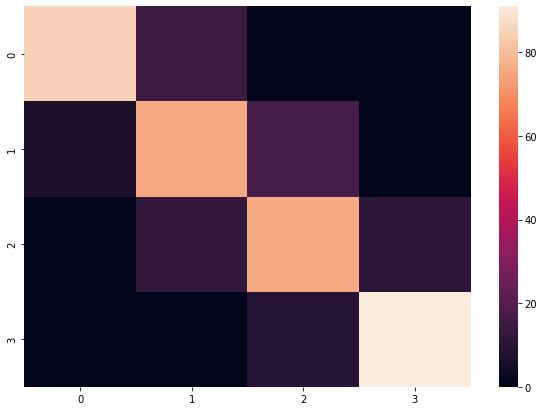

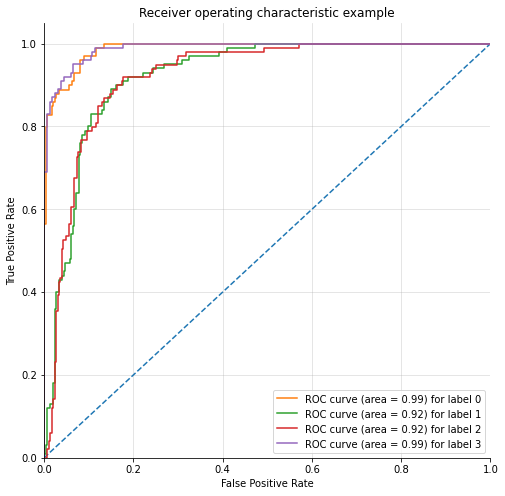

# Class 1

## Accuracy: 0.824
## Precision (weighted): 0.826
## Precision (macro): 0.826
## Precision (micro): 0.824
## Recall (weighted): 0.824
## Recall (macro): 0.824
## Recall (micro): 0.824
## F1 Score (weighted): 0.825
## F1 Score (macro): 0.825
## F1 Score (micro): 0.824
## Mean Squared Error: 0.176
## Mean Absolute Error: 0.176
## ROC AUC Score: 0.956


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90        99
           1       0.75      0.76      0.76       100
           2       0.74      0.76      0.75        99
           3       0.88      0.91      0.90       100

    accuracy                           0.82       398
   macro avg       0.83      0.82      0.82       398
weighted avg       0.83      0.82      0.82       398

Confusion Matrix:
 [[86 13  0  0]
 [ 7 76 17  0]
 [ 0 12 75 12]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.869 | 0.760 | 0.758 | 0.910 | 
| FPR | 0.023 | 0.084 | 0.087 | 0.040 | 
| TNR | 0.977 | 0.916 | 0.913 | 0.960 | 
| FNR | 0.131 | 0.240 | 0.242 | 0.090 | 
| ERR | 0.050 | 0.123 | 0.126 | 0.053 | 
| ACC | 0.950 | 0.877 | 0.874 | 0.947 | 
| F1 | 0.896 | 0.756 | 0.750 | 0.897 | 
| AUC | 0.923 | 0.838 | 0.835 | 0.935 | 


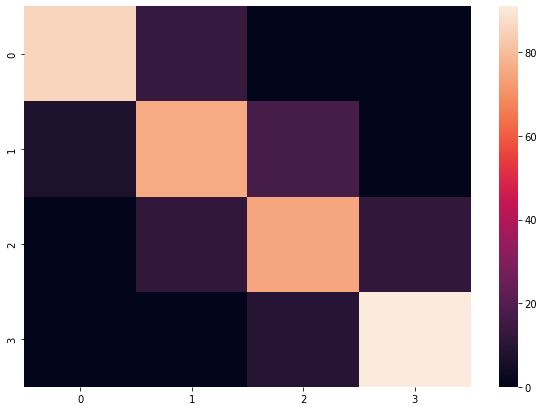

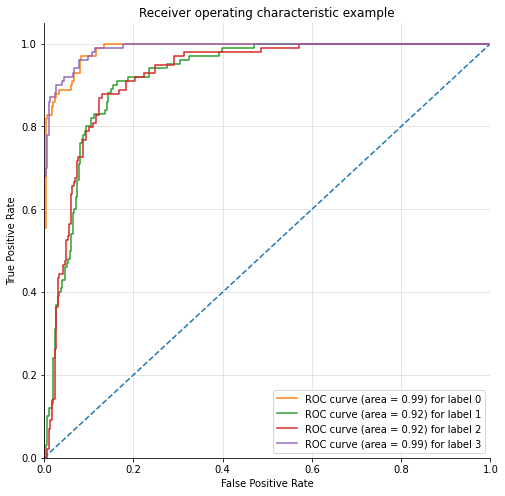

# Class 2

## Accuracy: 0.829
## Precision (weighted): 0.831
## Precision (macro): 0.832
## Precision (micro): 0.829
## Recall (weighted): 0.829
## Recall (macro): 0.829
## Recall (micro): 0.829
## F1 Score (weighted): 0.830
## F1 Score (macro): 0.830
## F1 Score (micro): 0.829
## Mean Squared Error: 0.171
## Mean Absolute Error: 0.171
## ROC AUC Score: 0.956


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.75      0.78      0.76       100
           2       0.76      0.77      0.76        99
           3       0.89      0.91      0.90       100

    accuracy                           0.83       398
   macro avg       0.83      0.83      0.83       398
weighted avg       0.83      0.83      0.83       398

Confusion Matrix:
 [[85 14  0  0]
 [ 7 78 15  0]
 [ 0 12 76 11]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.859 | 0.780 | 0.768 | 0.910 | 
| FPR | 0.023 | 0.087 | 0.080 | 0.037 | 
| TNR | 0.977 | 0.913 | 0.920 | 0.963 | 
| FNR | 0.141 | 0.220 | 0.232 | 0.090 | 
| ERR | 0.053 | 0.121 | 0.118 | 0.050 | 
| ACC | 0.947 | 0.879 | 0.882 | 0.950 | 
| F1 | 0.890 | 0.765 | 0.764 | 0.901 | 
| AUC | 0.918 | 0.846 | 0.844 | 0.937 | 


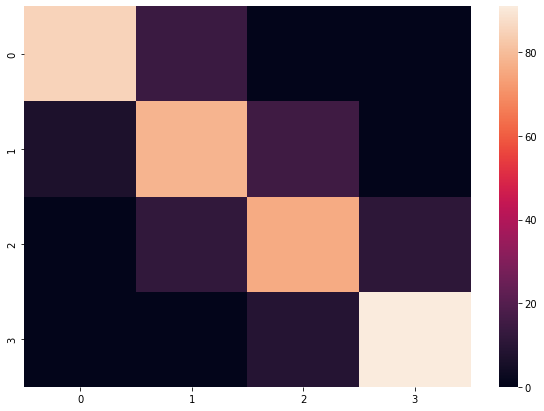

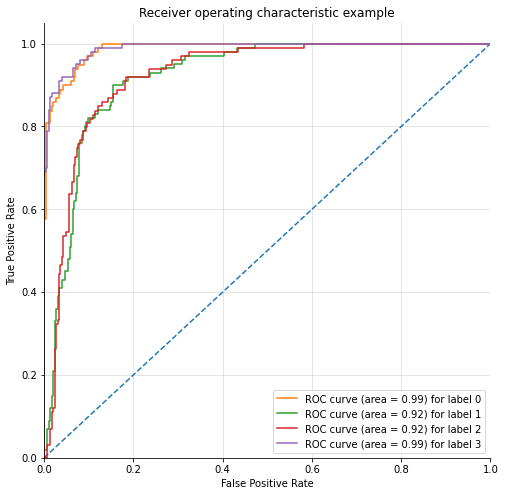

# Class 3

## Accuracy: 0.822
## Precision (weighted): 0.824
## Precision (macro): 0.824
## Precision (micro): 0.822
## Recall (weighted): 0.822
## Recall (macro): 0.822
## Recall (micro): 0.822
## F1 Score (weighted): 0.822
## F1 Score (macro): 0.822
## F1 Score (micro): 0.822
## Mean Squared Error: 0.178
## Mean Absolute Error: 0.178
## ROC AUC Score: 0.956


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.74      0.77      0.75       100
           2       0.75      0.75      0.75        99
           3       0.88      0.91      0.90       100

    accuracy                           0.82       398
   macro avg       0.82      0.82      0.82       398
weighted avg       0.82      0.82      0.82       398

Confusion Matrix:
 [[85 14  0  0]
 [ 7 77 16  0]
 [ 0 13 74 12]
 [ 0  0  9 91]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.859 | 0.770 | 0.747 | 0.910 | 
| FPR | 0.023 | 0.091 | 0.084 | 0.040 | 
| TNR | 0.977 | 0.909 | 0.916 | 0.960 | 
| FNR | 0.141 | 0.230 | 0.253 | 0.090 | 
| ERR | 0.053 | 0.126 | 0.126 | 0.053 | 
| ACC | 0.947 | 0.874 | 0.874 | 0.947 | 
| F1 | 0.890 | 0.755 | 0.747 | 0.897 | 
| AUC | 0.918 | 0.840 | 0.832 | 0.935 | 


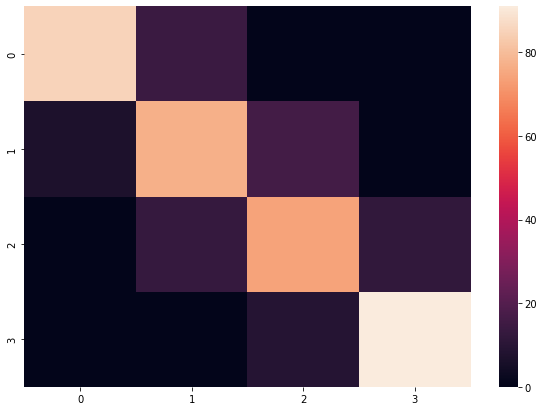

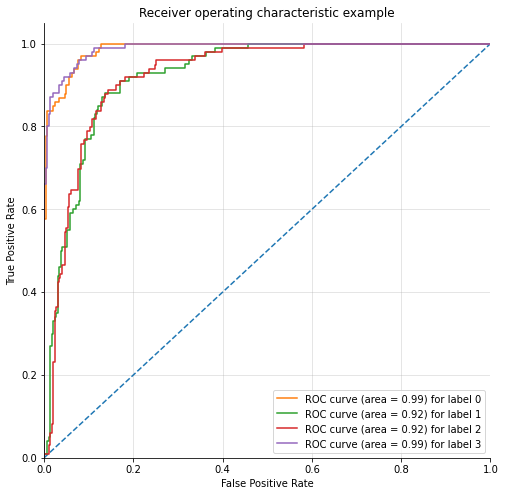

In [66]:
for index,best_features in enumerate(best_features_per_class):
    X_selected = X[best_features]
    X_tr, X_te, y_tr, y_te = train_test_split(X_selected, data['price_range'], test_size=0.2, random_state=0, stratify=data['price_range'])
    model = GaussianNB()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    printmd(f"# Class {index}")
    metrics(y_test=y_te, y_pred=y_pred, cnf_matrix=confusion_matrix(y_te, y_pred), model=model, X_test=X_te)
    

In [67]:
for index,best_features in enumerate(best_features_per_class_encoded):
    X_selected = X[best_features]
    X_tr, X_te, y_tr, y_te = train_test_split(X_selected, data_sets[index]['price_range'], test_size=0.2, random_state=0, stratify=data_sets[index]['price_range'])
    model = GaussianNB()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    printmd(f"## Data Set {index}")
    print(classification_report(y_te, y_pred))    

## Data Set 0

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       299
         1.0       0.90      0.95      0.93        99

    accuracy                           0.96       398
   macro avg       0.94      0.96      0.95       398
weighted avg       0.96      0.96      0.96       398



## Data Set 1

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       299
         1.0       0.88      0.22      0.35        99

    accuracy                           0.80       398
   macro avg       0.84      0.61      0.62       398
weighted avg       0.82      0.80      0.75       398



## Data Set 2

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       299
         1.0       0.75      0.18      0.29        99

    accuracy                           0.78       398
   macro avg       0.77      0.58      0.58       398
weighted avg       0.78      0.78      0.73       398



## Data Set 3

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       298
         1.0       0.90      0.94      0.92       100

    accuracy                           0.96       398
   macro avg       0.94      0.95      0.94       398
weighted avg       0.96      0.96      0.96       398



In [68]:
# from sklearn.inspection import permutation_importance
# imps = permutation_importance(model, X_test, y_test)
# print(imps.importances_mean)
# gnb_feature = pd.Series(imps.importances_mean, index=features.columns)
# highest_importance = gnb_feature.nlargest(10)
# gnb_feature.nlargest(10).plot(kind='barh')
# plt.show()
# print(highest_importance)